<a href="https://colab.research.google.com/github/Sainikithaharish06/proj-2/blob/main/NAVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("naval_vessel.csv", names=["LEVER POSITION","SHIP SPEED","GAS TURBINE SHAFT TORQUE","GAS TURBINE RATE OF REVOLUTIONS","GAS GENERATOR RATE OF REVOLUTIONS",
                          "STARBOARD PROPELLER TORQUE","PORT PROPELLER TORQUE","HP TURBINE EXIT TEMPERATURE","GT COMPRESSOR INLET AIR TEMPERATURE",
                          "GT COMPRESSOR OUTLET AIR TEMPERATURE","HP TURBINE EXIT PRESSURE","GT COMPRESSOR INLET AIR PRESSURE","GT COMPRESSOR OUTLET AIR PRESSURE",
                          "GAS TURBINE EXHAUST GAS PRESSURE","TURBINE INJECTON CONTROL","FUEL FLOW","GT COMPRESSOR DECAY STATE COEFFICIENT","GT TURBINE DECAY STATE COEFFICIENT"])
df.head(5)

,LEVER POSITION,SHIP SPEED,GAS TURBINE SHAFT TORQUE,GAS TURBINE RATE OF REVOLUTIONS,GAS GENERATOR RATE OF REVOLUTIONS,STARBOARD PROPELLER TORQUE,PORT PROPELLER TORQUE,HP TURBINE EXIT TEMPERATURE,GT COMPRESSOR INLET AIR TEMPERATURE,GT COMPRESSOR OUTLET AIR TEMPERATURE,HP TURBINE EXIT PRESSURE,GT COMPRESSOR INLET AIR PRESSURE,GT COMPRESSOR OUTLET AIR PRESSURE,GAS TURBINE EXHAUST GAS PRESSURE,TURBINE INJECTON CONTROL,FUEL FLOW,GT COMPRESSOR DECAY STATE COEFFICIENT,GT TURBINE DECAY STATE COEFFICIENT
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
df.shape

(11934, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   LEVER POSITION                         11934 non-null  float64
 1   SHIP SPEED                             11934 non-null  float64
 2   GAS TURBINE SHAFT TORQUE               11934 non-null  float64
 3   GAS TURBINE RATE OF REVOLUTIONS        11934 non-null  float64
 4   GAS GENERATOR RATE OF REVOLUTIONS      11934 non-null  float64
 5   STARBOARD PROPELLER TORQUE             11934 non-null  float64
 6   PORT PROPELLER TORQUE                  11934 non-null  float64
 7   HP TURBINE EXIT TEMPERATURE            11934 non-null  float64
 8   GT COMPRESSOR INLET AIR TEMPERATURE    11934 non-null  float64
 9   GT COMPRESSOR OUTLET AIR TEMPERATURE   11934 non-null  float64
 10  HP TURBINE EXIT PRESSURE               11934 non-null  float64
 11  GT

In [ ]:
df.isna().sum()

LEVER POSITION                           0
SHIP SPEED                               0
GAS TURBINE SHAFT TORQUE                 0
GAS TURBINE RATE OF REVOLUTIONS          0
GAS GENERATOR RATE OF REVOLUTIONS        0
STARBOARD PROPELLER TORQUE               0
PORT PROPELLER TORQUE                    0
HP TURBINE EXIT TEMPERATURE              0
GT COMPRESSOR INLET AIR TEMPERATURE      0
GT COMPRESSOR OUTLET AIR TEMPERATURE     0
HP TURBINE EXIT PRESSURE                 0
GT COMPRESSOR INLET AIR PRESSURE         0
GT COMPRESSOR OUTLET AIR PRESSURE        0
GAS TURBINE EXHAUST GAS PRESSURE         0
TURBINE INJECTON CONTROL                 0
FUEL FLOW                                0
GT COMPRESSOR DECAY STATE COEFFICIENT    0
GT TURBINE DECAY STATE COEFFICIENT       0
dtype: int64

In [ ]:
df.describe()

,LEVER POSITION,SHIP SPEED,GAS TURBINE SHAFT TORQUE,GAS TURBINE RATE OF REVOLUTIONS,GAS GENERATOR RATE OF REVOLUTIONS,STARBOARD PROPELLER TORQUE,PORT PROPELLER TORQUE,HP TURBINE EXIT TEMPERATURE,GT COMPRESSOR INLET AIR TEMPERATURE,GT COMPRESSOR OUTLET AIR TEMPERATURE,HP TURBINE EXIT PRESSURE,GT COMPRESSOR INLET AIR PRESSURE,GT COMPRESSOR OUTLET AIR PRESSURE,GAS TURBINE EXHAUST GAS PRESSURE,TURBINE INJECTON CONTROL,FUEL FLOW,GT COMPRESSOR DECAY STATE COEFFICIENT,GT TURBINE DECAY STATE COEFFICIENT
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


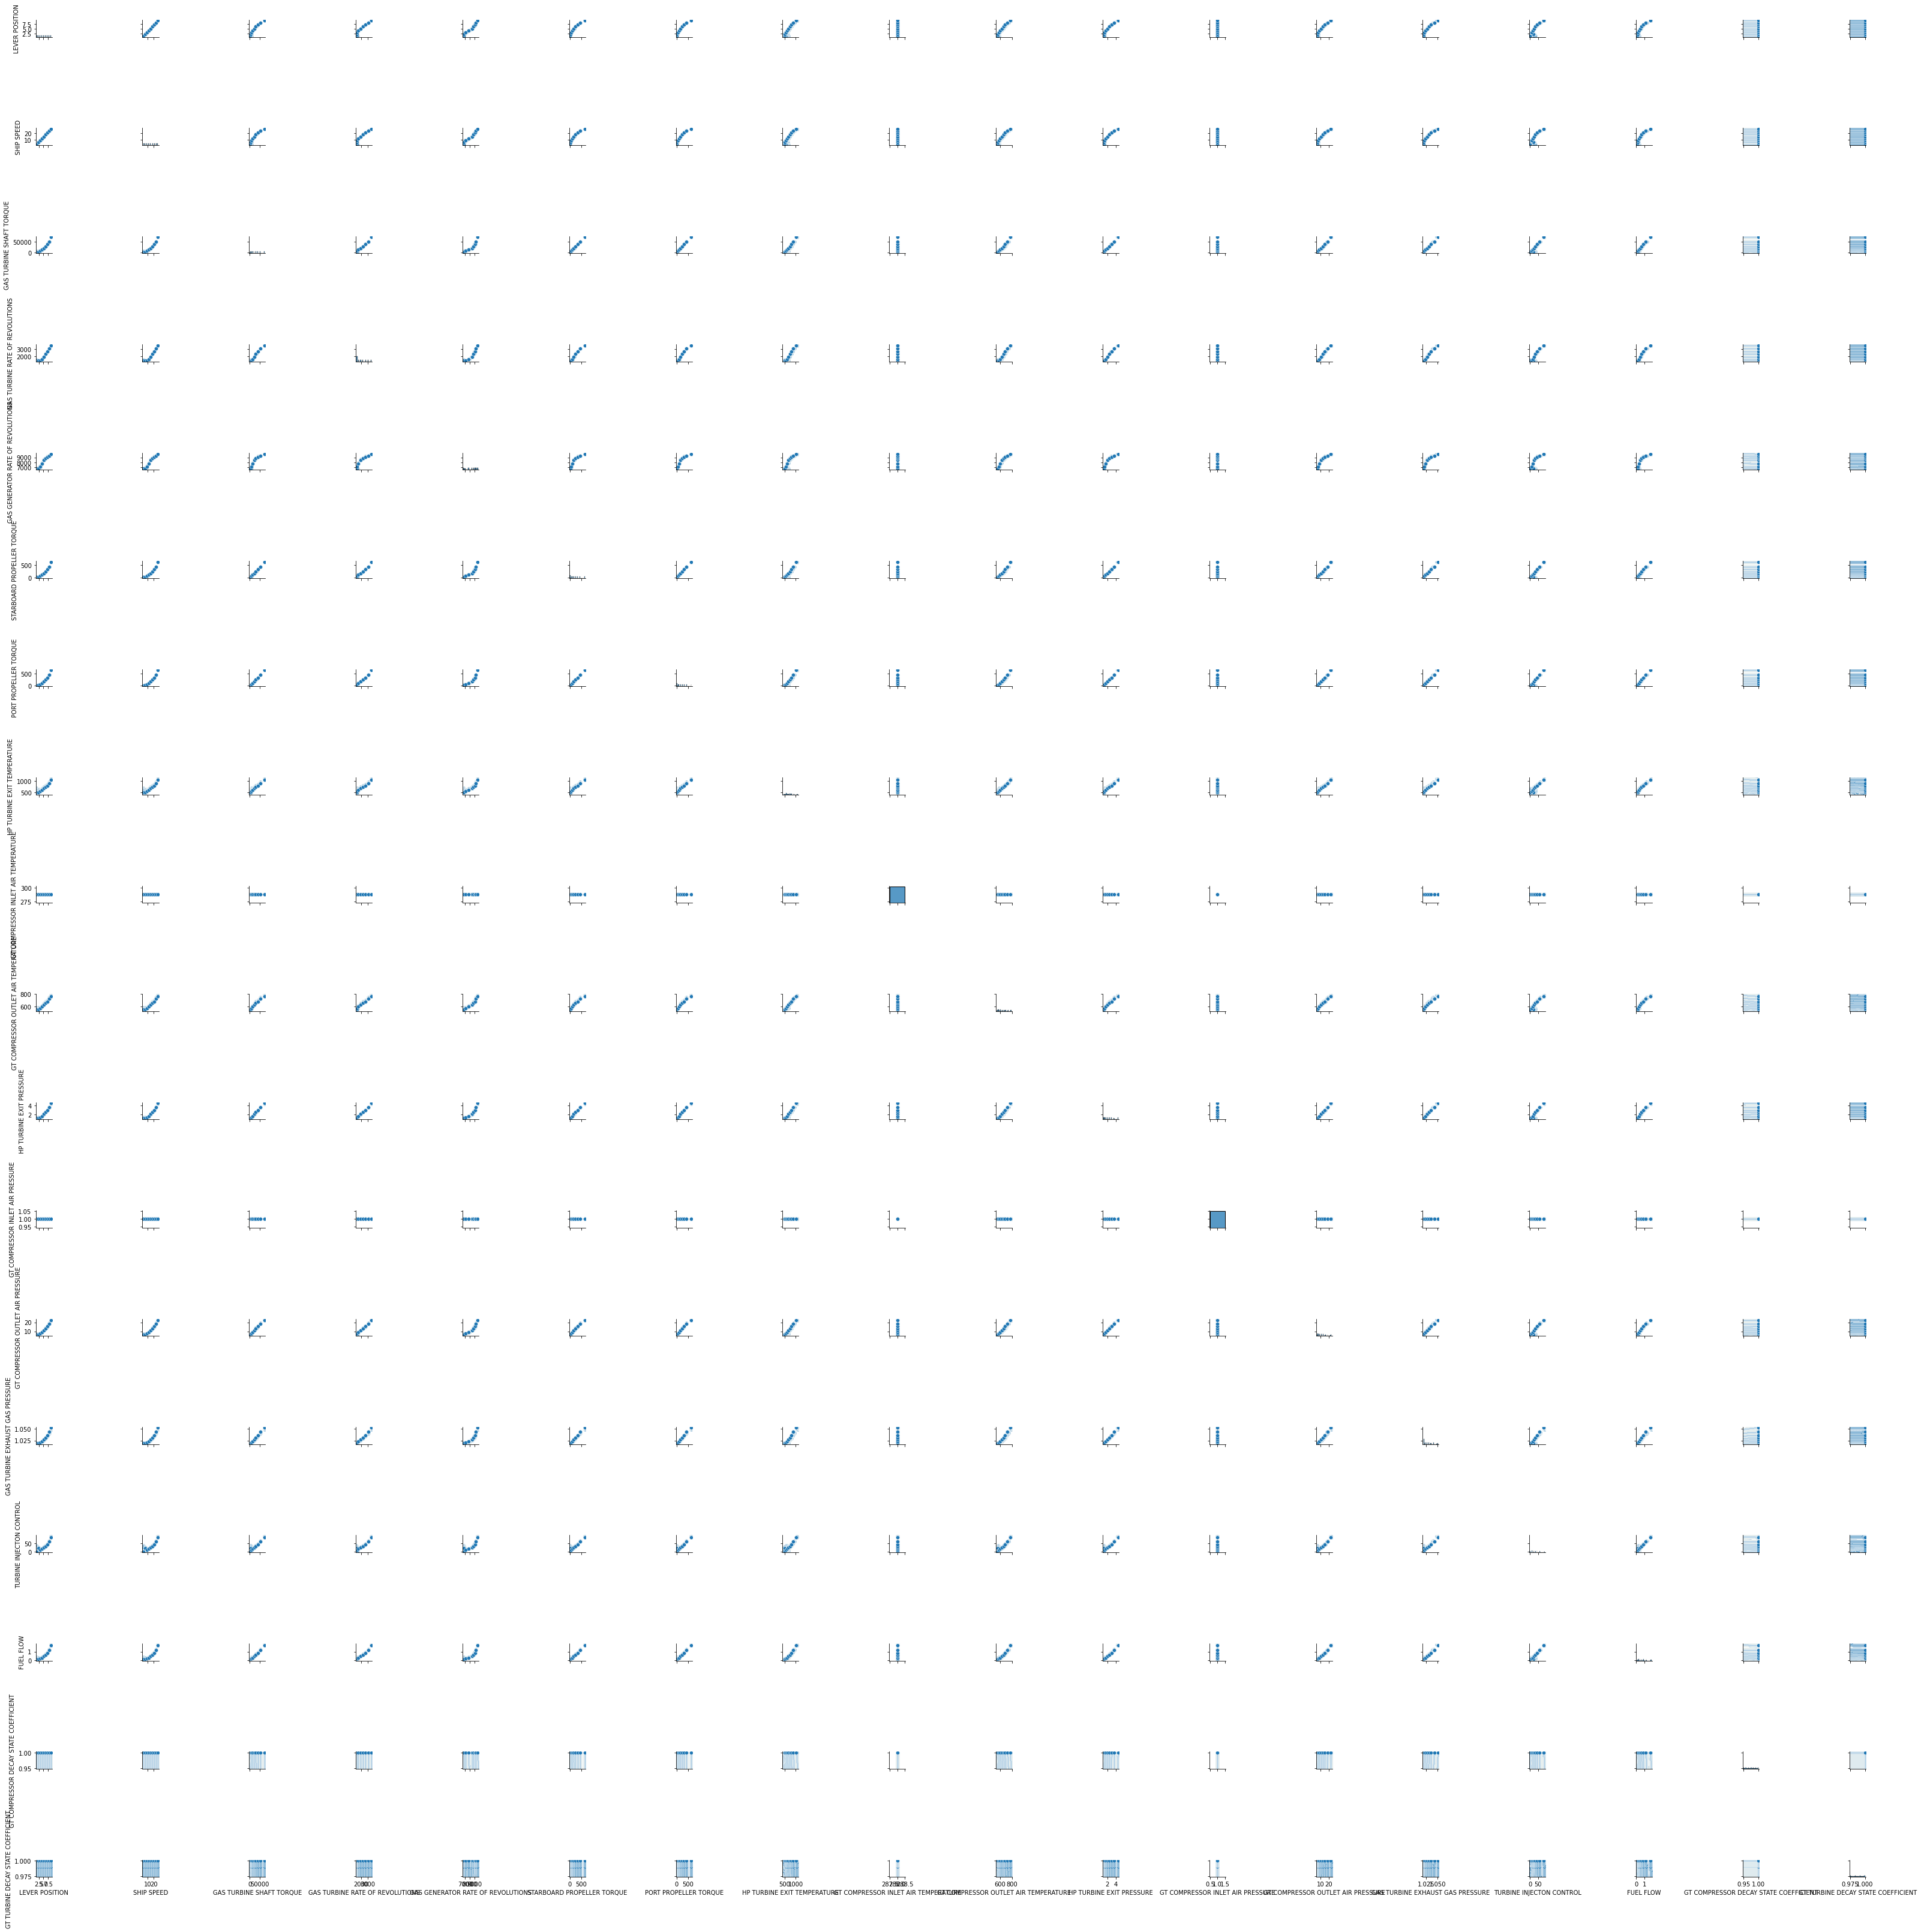

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show()

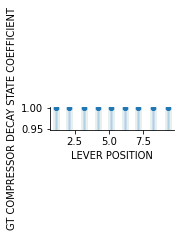

In [ ]:
sns.pairplot(df,x_vars="LEVER POSITION",y_vars="GT COMPRESSOR DECAY STATE COEFFICIENT")
plt.show()

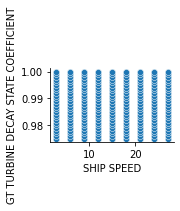

In [ ]:
sns.pairplot(df,x_vars="SHIP SPEED",y_vars="GT TURBINE DECAY STATE COEFFICIENT")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


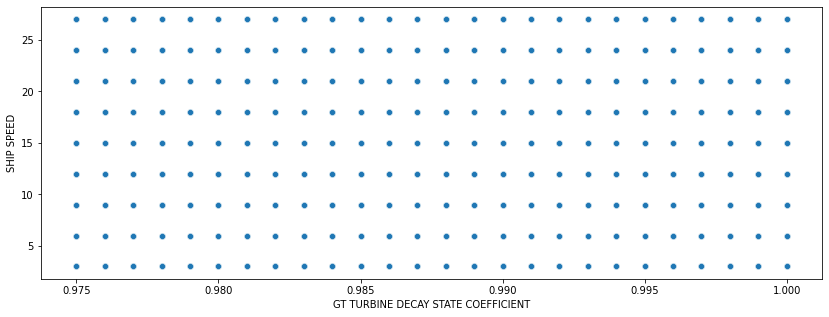

In [ ]:
plt.figure(figsize=(14,5))
sns.scatterplot(df['GT TURBINE DECAY STATE COEFFICIENT'],df['SHIP SPEED'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


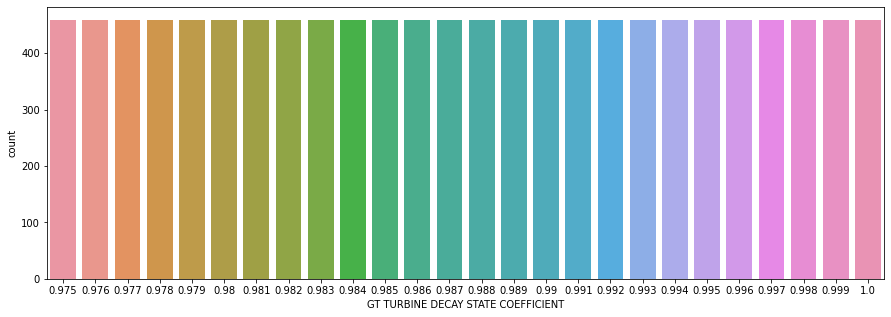

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(df['GT TURBINE DECAY STATE COEFFICIENT'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


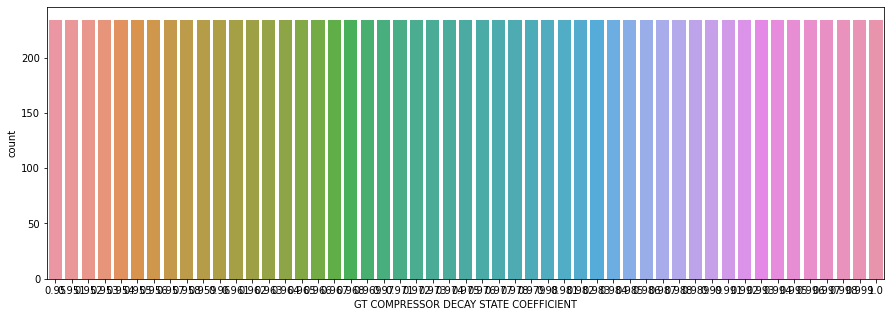

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df['GT COMPRESSOR DECAY STATE COEFFICIENT'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

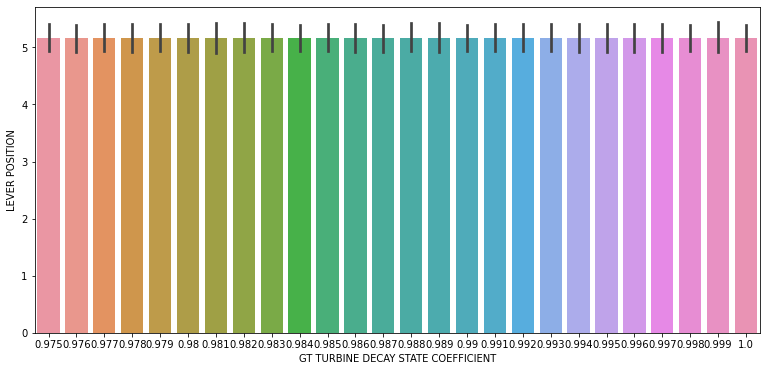

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,6))
sns.barplot(df['GT TURBINE DECAY STATE COEFFICIENT'],df['LEVER POSITION'])
plt.show

**CORRELATION**

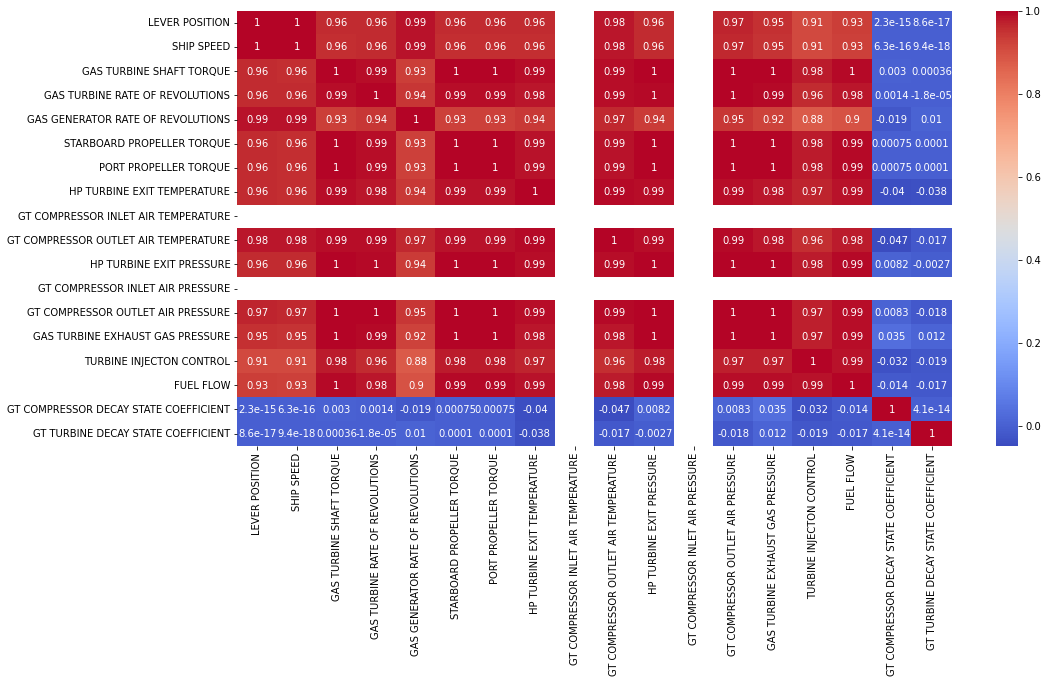

In [ ]:
correlation=df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")

In [ ]:
df.corr()['GT TURBINE DECAY STATE COEFFICIENT'].sort_values()

HP TURBINE EXIT TEMPERATURE             -3.846390e-02
TURBINE INJECTON CONTROL                -1.887184e-02
GT COMPRESSOR OUTLET AIR PRESSURE       -1.830336e-02
FUEL FLOW                               -1.732675e-02
GT COMPRESSOR OUTLET AIR TEMPERATURE    -1.685505e-02
HP TURBINE EXIT PRESSURE                -2.718186e-03
GAS TURBINE RATE OF REVOLUTIONS         -1.776556e-05
SHIP SPEED                               9.367920e-18
LEVER POSITION                           8.566427e-17
GT COMPRESSOR DECAY STATE COEFFICIENT    4.064242e-14
STARBOARD PROPELLER TORQUE               1.044235e-04
PORT PROPELLER TORQUE                    1.044235e-04
GAS TURBINE SHAFT TORQUE                 3.576383e-04
GAS GENERATOR RATE OF REVOLUTIONS        1.000011e-02
GAS TURBINE EXHAUST GAS PRESSURE         1.179423e-02
GT TURBINE DECAY STATE COEFFICIENT       1.000000e+00
GT COMPRESSOR INLET AIR TEMPERATURE               NaN
GT COMPRESSOR INLET AIR PRESSURE                  NaN
Name: GT TURBINE DECAY STATE

In [ ]:
df.corr()['GT COMPRESSOR DECAY STATE COEFFICIENT'].sort_values()

GT COMPRESSOR OUTLET AIR TEMPERATURE    -4.717657e-02
HP TURBINE EXIT TEMPERATURE             -3.962512e-02
TURBINE INJECTON CONTROL                -3.203662e-02
GAS GENERATOR RATE OF REVOLUTIONS       -1.883800e-02
FUEL FLOW                               -1.366765e-02
SHIP SPEED                               6.346298e-16
LEVER POSITION                           2.264405e-15
GT TURBINE DECAY STATE COEFFICIENT       4.064242e-14
STARBOARD PROPELLER TORQUE               7.535000e-04
PORT PROPELLER TORQUE                    7.535000e-04
GAS TURBINE RATE OF REVOLUTIONS          1.369908e-03
GAS TURBINE SHAFT TORQUE                 2.978258e-03
HP TURBINE EXIT PRESSURE                 8.167586e-03
GT COMPRESSOR OUTLET AIR PRESSURE        8.327871e-03
GAS TURBINE EXHAUST GAS PRESSURE         3.528524e-02
GT COMPRESSOR DECAY STATE COEFFICIENT    1.000000e+00
GT COMPRESSOR INLET AIR TEMPERATURE               NaN
GT COMPRESSOR INLET AIR PRESSURE                  NaN
Name: GT COMPRESSOR DECAY ST

**TRAIN AD TEST FIT**

# 1) GT COMPRESSOR DECAY STATE COEFICIENT

In [ ]:
x= df.drop(["GT TURBINE DECAY STATE COEFFICIENT","GT COMPRESSOR DECAY STATE COEFFICIENT"],axis=1).values
y=df["GT COMPRESSOR DECAY STATE COEFFICIENT"].values

In [ ]:
x

array([[1.1380000e+00, 3.0000000e+00, 2.8996400e+02, ..., 1.0190000e+00,
        7.1370000e+00, 8.2000000e-02],
       [2.0880000e+00, 6.0000000e+00, 6.9601800e+03, ..., 1.0190000e+00,
        1.0655000e+01, 2.8700000e-01],
       [3.1440000e+00, 9.0000000e+00, 8.3792290e+03, ..., 1.0200000e+00,
        1.3086000e+01, 2.5900000e-01],
       ...,
       [7.1480000e+00, 2.1000000e+01, 3.9003867e+04, ..., 1.0360000e+00,
        4.2104000e+01, 8.3400000e-01],
       [8.2060000e+00, 2.4000000e+01, 5.0992579e+04, ..., 1.0430000e+00,
        5.8064000e+01, 1.1490000e+00],
       [9.3000000e+00, 2.7000000e+01, 7.2775130e+04, ..., 1.0520000e+00,
        8.6067000e+01, 1.7040000e+00]])

In [ ]:
y

array([0.95, 0.95, 0.95, ..., 1.  , 1.  , 1.  ])

In [ ]:
from sklearn.model_selection  import train_test_split
x1_train,x1_test,y1_train,y1_test= train_test_split(x,y,test_size=0.20,train_size=80)
x2_train,x2_test,y2_train,y2_test= train_test_split(x,y,test_size=0.25,train_size=85)
x3_train,x3_test,y3_train,y3_test= train_test_split(x,y,test_size=0.30,train_size=70)
x4_train,x4_test,y4_train,y4_test= train_test_split(x,y,test_size=0.35,train_size=65)

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x1_train,y1_train)
lm.fit(x2_train,y2_train)
lm.fit(x3_train,y3_train)
lm.fit(x4_train,y4_train)


LinearRegression()

In [ ]:
y1_pred=lm.predict(x1_test)
y2_pred=lm.predict(x2_test)
y3_pred=lm.predict(x3_test)
y4_pred=lm.predict(x4_test)


In [ ]:
print(y1_pred)

[0.98847729 0.97409897 0.98163724 ... 0.98425389 0.95295682 0.96065332]


In [ ]:
print(y2_pred)


[0.98324741 0.97028935 0.97273615 ... 0.97695417 0.95515422 0.98621376]


In [ ]:
print(y3_pred)

[0.99011587 0.97898794 0.96896454 ... 0.99974183 0.97926581 0.96438549]


In [ ]:
print(y4_pred)

[0.98541952 0.99010012 0.99140586 ... 0.96070285 0.95266931 0.99664189]


In [ ]:
lm.coef_

array([ 2.47191869e-01, -7.13152921e-02,  3.44795909e-06, -2.04981856e-05,
        4.76149552e-05, -8.20505407e-04, -8.20505407e-04, -3.69626370e-04,
       -5.72458747e-15, -3.22019952e-03,  1.19014626e-01, -5.55111512e-17,
        1.92942526e-02,  2.91294239e-01, -7.47692627e-04,  4.03943494e-01])

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
r2_score(y1_test,y1_pred)

0.8179574750848035

In [ ]:
r2_score(y2_test,y2_pred)

0.8190360763310761

In [ ]:
r2_score(y3_test,y3_pred)

0.828320644513297

In [ ]:
r2_score(y4_test,y4_pred)

0.8228647741747598

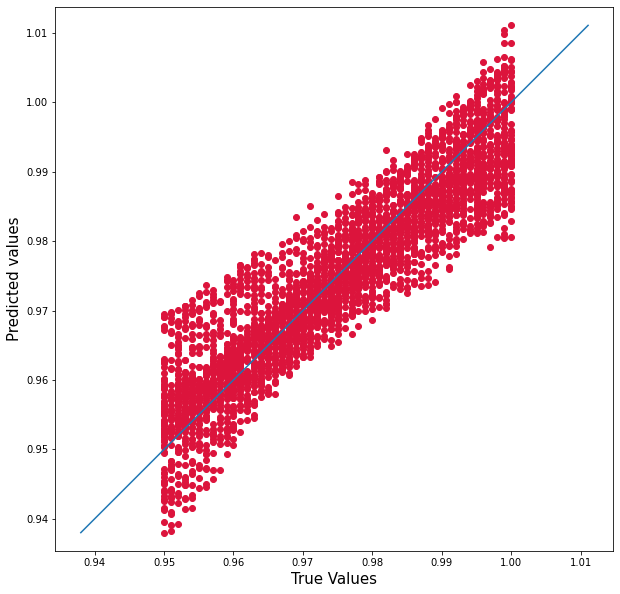

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'actual vs predicted')

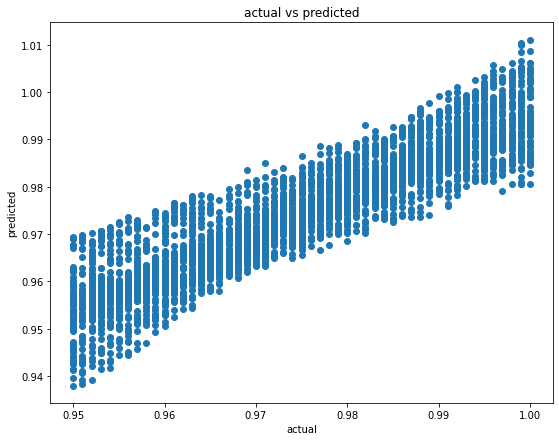

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")

In [ ]:
linear_prediction=lm.predict(x1_test)
print("train score:{}\n".format(lm.score(x1_train,y1_train)))
print("test score:{}\n".format(lm.score(x1_test,y1_test)))
print("overall model accuracy:{}\n".format(r2_score(y1_test,linear_prediction)))
print("mean absolute error:{}\n".format(mean_absolute_error(y1_test,linear_prediction)))

train score:0.8635206170460176

test score:0.8179574750848035

overall model accuracy:0.8179574750848035

mean absolute error:0.004795258945135839



# 2) GT TURBINE DECAY STATE COEFFICIENT

In [ ]:
x= df.drop(["GT TURBINE DECAY STATE COEFFICIENT","GT COMPRESSOR DECAY STATE COEFFICIENT"],axis=1).values
y=df["GT TURBINE DECAY STATE COEFFICIENT"].values

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.20,train_size=80)
x2_train,x2_test,y2_train,y2_test= train_test_split(x,y,test_size=0.25,train_size=75)


In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x1_train,y1_train)
lm.fit(x2_train,y2_train)


LinearRegression()

In [ ]:
y1_pred=lm.predict(x1_test)
print(y1_pred)

[0.97884465 0.99505602 0.97515935 ... 0.97617924 0.96531789 0.9959242 ]


In [ ]:
y2_pred=lm.predict(x2_test)
print(y2_pred)

[0.96065313 0.98870658 0.98166614 ... 0.97243995 0.97812829 0.96974485]


In [ ]:
x

array([[1.1380000e+00, 3.0000000e+00, 2.8996400e+02, ..., 1.0190000e+00,
        7.1370000e+00, 8.2000000e-02],
       [2.0880000e+00, 6.0000000e+00, 6.9601800e+03, ..., 1.0190000e+00,
        1.0655000e+01, 2.8700000e-01],
       [3.1440000e+00, 9.0000000e+00, 8.3792290e+03, ..., 1.0200000e+00,
        1.3086000e+01, 2.5900000e-01],
       ...,
       [7.1480000e+00, 2.1000000e+01, 3.9003867e+04, ..., 1.0360000e+00,
        4.2104000e+01, 8.3400000e-01],
       [8.2060000e+00, 2.4000000e+01, 5.0992579e+04, ..., 1.0430000e+00,
        5.8064000e+01, 1.1490000e+00],
       [9.3000000e+00, 2.7000000e+01, 7.2775130e+04, ..., 1.0520000e+00,
        8.6067000e+01, 1.7040000e+00]])

In [ ]:
y

array([0.95, 0.95, 0.95, ..., 1.  , 1.  , 1.  ])

In [ ]:
lm.coef_

array([ 2.80599555e-01, -8.14809928e-02, -1.61950588e-06, -3.40006303e-05,
        3.90898398e-05, -5.70656667e-04, -5.70656666e-04,  6.83126868e-05,
        4.40550374e-14, -3.65200789e-03,  1.14375857e-01, -5.55111512e-15,
        1.64987408e-02,  6.00563222e+00, -8.38130158e-04,  2.89651687e-01])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score(y1_test,y1_pred)

0.8189747592169303

In [ ]:
r2_score(y2_test,y2_pred)

0.8233462660218169

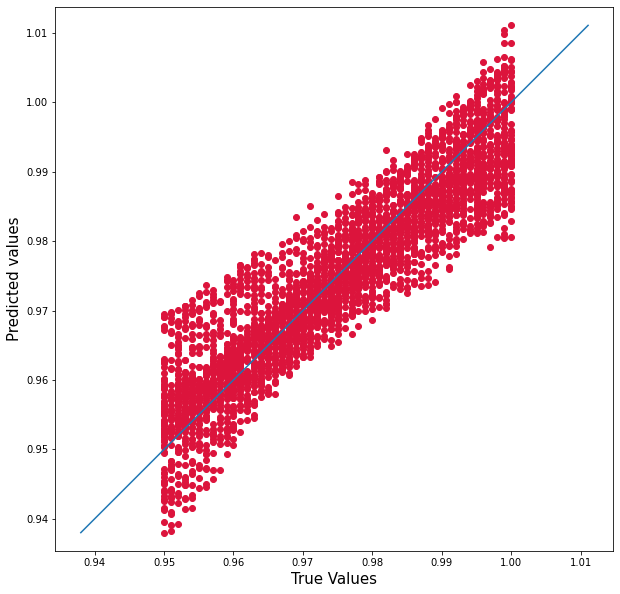

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'actual vs predicted')

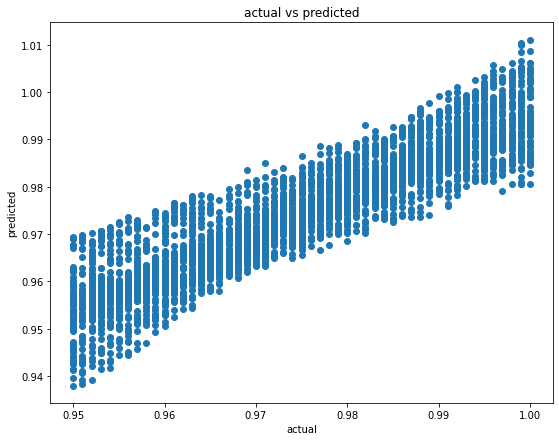

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")

In [ ]:
linear_prediction=lm.predict(x_test)
print("train score:{}\n".format(lm.score(x_train,y_train)))
print("test score:{}\n".format(lm.score(x_test,y_test)))
print("overall model accuracy:{}\n".format(r2_score(y_test,linear_prediction)))
print("mean squared error:{}\n".format(mean_squared_error(y_test,linear_prediction)))

train score:0.8188505031050348

test score:0.8226801246268658

overall model accuracy:0.8226801246268658

mean squared error:3.80816148880831e-05

